In [1]:
from astroML.datasets import fetch_dr7_quasar

# Fetch the quasar data
data = fetch_dr7_quasar()

# select the first 10000 points
data = data[:10000]

z = data['redshift']

In [2]:
import numpy as np                        # Math
import scipy.stats                        # Statistics
from matplotlib import pyplot as plt      # Plots

### Rejection sampling

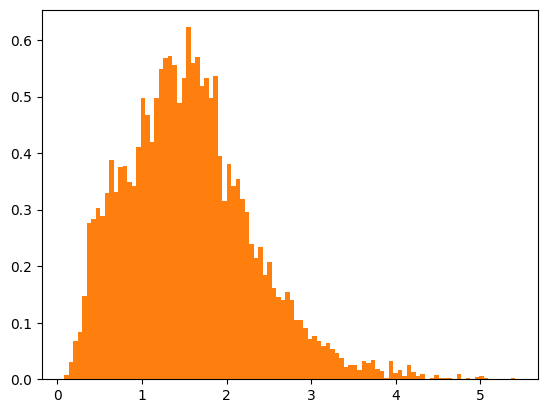

In [3]:
# Normalize the hist to have a pdf
nbin = 100
y = plt.hist(z, nbin, density=True)[0]
x = plt.hist(z, nbin, density=True)[1]
plt.show()
# print(x)

In [4]:
xmin = np.min(x)
xmax = np.max(x)
ymax = np.max(y)

In [15]:
Nt = 10000

xt = np.random.uniform(0,10,Nt)
yt = np.random.uniform(0,ymax,Nt)

xnew = np.array([])
ynew = np.array([])
xplot = np.array([])

for i in range(nbin):
    xplot = np.append(xplot, (x[i+1] + x[i])/2)

In [16]:
for t in range(Nt):
    for i in range(nbin):
        if xt[t] > x[i] and xt[t] < x[i+1]:
            if yt[t] < y[i]:
                xnew = np.append(xnew, xt[t])
                ynew = np.append(ynew, yt[t])

print(xnew);
print(np.size(xnew))
print(ynew);
print(np.size(ynew))

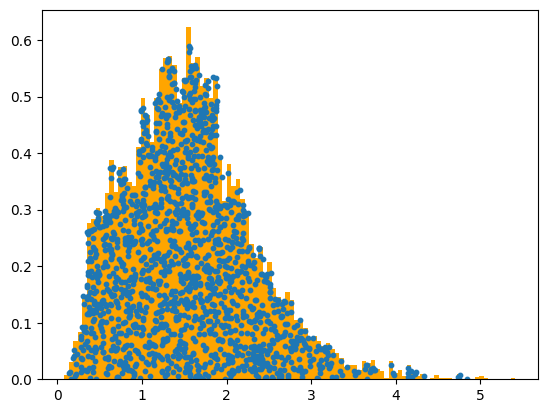

In [24]:
plt.hist(z, nbin, density=True, color='orange')
plt.scatter(xnew,ynew,s=10)
#plt.plot(xplot,y)
plt.show()

### Inverse transform sampling

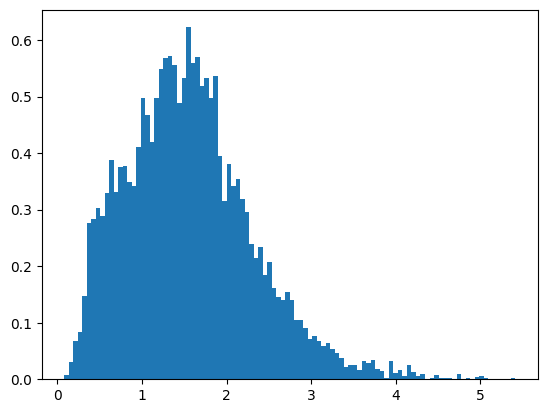

In [34]:
from scipy import stats, interpolate

Ndata = 1000

# create a cumulative distribution
z.sort()
Pz_cuml = np.linspace(0, 1, np.size(z))

# set up an interpolation of the inverse cumulative distribution
tck = interpolate.splrep(Pz_cuml, z)

# sample evenly along the cumulative distribution, and interpolate
Pz_cuml_sample = np.linspace(0, 1, 10 * Ndata)
z_sample = interpolate.splev(Pz_cuml_sample, tck)

plt.hist(z_sample, nbin, density=True)
plt.show()